# Particle Classification with PCA: Gamma vs. Hadrons  

## Introduction  

This project focuses on classifying particles as either **gamma (signal)** or **hadrons (background)** using **Principal Component Analysis (PCA)** for dimensionality reduction and a **Support Vector Classifier (SVC)** for classification. The dataset used contains correlated features, which makes PCA an effective tool for transforming these features into a new set of uncorrelated components.

The project is divided into two main parts:

1. **Feature Influence and Variance Analysis**:  
   - We analyze the dataset to understand the influence of each feature through the variance they capture.  
   - An **eigendecomposition** of the covariance matrix is performed to identify the most informative directions (principal components).

2. **PCA, Visualization, and Classification**:  
   - PCA is applied to project the dataset onto its **two principal axes** (components), reducing the dimensionality while preserving as much variance as possible.  
   - We visualize the classification of particles in the reduced 2D space.  
   - A **Support Vector Classifier (SVC)** is trained using the two principal components, and the model's performance is evaluated using the **accuracy score**.

This project highlights the importance of PCA in simplifying high-dimensional data and improving the interpretability of machine learning models while maintaining classification performance. The dataset was generated using the Monte Carlo simulation program **Corsika**, as described in:  
*D. Heck et al., "CORSIKA: A Monte Carlo Code to Simulate Extensive Air Showers," Forschungszentrum Karlsruhe FZKA 6019 (1998).*


## PART I: Variance Explained and Dimensionality Reduction for Telescope Particle Classification

### Dataset Observation

In [17]:
# Main libraries import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load the dataset
df = pd.read_csv('./telescope_data.csv', sep=';', index_col=0)

print(df.info())
print(df['class'].value_counts())
# Selfreflection: g has 12k instances compared to h with 6.7k instances. This miight a problem for the model if we want to make classification based on the class column

print(df.head(2))

<class 'pandas.core.frame.DataFrame'>
Index: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.7+ MB
None
class
g    12332
h     6688
Name: count, dtype: int64
   fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fM3Trans  \
0  28.7967  16.0021  2.6449  0.3918  0.1982  27.7004  22.0110   -8.2027   
1  31.6036  11.7235  2.5185  0.5303  0.3773  26.2722  23.8238   -9.9574   

    fAlpha     fDist class  
0  40.0920   81.8828  

In [19]:
# Dataset  cleaning and preprocessing: removing null and na values

df = df.dropna()
print(df.isnull().sum()) # Verification that no null values are present in the dataset

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64


### Understanding influence of features by their variance: Eigen Values and vectors

In [20]:
# Extraction of predictors and target variables

data_matrix = df.drop('class', axis=1)
classes = df['class']


In [21]:
# Creation of a correlation matrix to see the relationship between the variables
corr_matrix = data_matrix.corr()
print(corr_matrix.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, fLength to fDist
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   10 non-null     float64
 1   fWidth    10 non-null     float64
 2   fSize     10 non-null     float64
 3   fConc     10 non-null     float64
 4   fConc1    10 non-null     float64
 5   fAsym     10 non-null     float64
 6   fM3Long   10 non-null     float64
 7   fM3Trans  10 non-null     float64
 8   fAlpha    10 non-null     float64
 9   fDist     10 non-null     float64
dtypes: float64(10)
memory usage: 1.2+ KB
None


<Axes: >

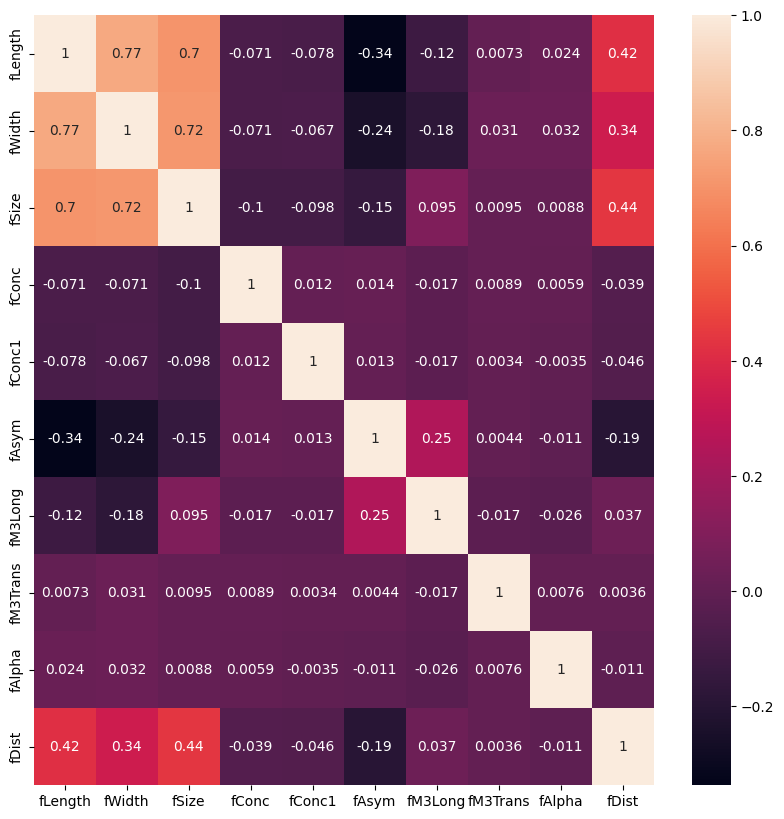

In [22]:
# Heatmap representation of the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)

In [23]:
# EIGEN DECOMPOSITION


# Generation of Eignvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)
print("Eigenvalues (raw):", eigenvalues)

# Sort the eigenvalues in descending order and get the indices
sorted_indices = np.argsort(eigenvalues)[::-1]

# Reorder eigenvalues and eigenvectors using the sorted indices
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Print the sorted eigenvalues and eigenvectors
print("Eigenvalues (sorted):", eigenvalues_sorted)
print("Eigenvectors (sorted):", eigenvectors_sorted)


Eigenvalues (raw): [2.88499229 0.20817608 0.25450353 0.65125703 1.23829162 0.79394262
 1.01128642 0.97585266 0.99619479 0.98550297]
Eigenvalues (sorted): [2.88499229 1.23829162 1.01128642 0.99619479 0.98550297 0.97585266
 0.79394262 0.65125703 0.25450353 0.20817608]
Eigenvectors (sorted): [[-0.53048095  0.02197779  0.00520658 -0.0065846   0.00676877 -0.04405601
  -0.13913577 -0.12532645 -0.62614051 -0.53752424]
 [-0.51542609  0.02961779  0.04960307 -0.01189605 -0.02128031 -0.02448949
  -0.35323616 -0.08394681 -0.12067057  0.76381931]
 [-0.49876449 -0.26939171  0.04060253 -0.01600826 -0.01018462 -0.068966
  -0.16846482 -0.09717974  0.73605329 -0.30380665]
 [ 0.07503604  0.16179454  0.28215799 -0.11931371  0.75405986 -0.54543119
  -0.07863017 -0.03702627  0.02470101 -0.00883063]
 [ 0.07634016  0.15972983 -0.11159879 -0.43567266 -0.56062481 -0.66962792
  -0.0518926  -0.02308755  0.01506419 -0.01546185]
 [ 0.24776193 -0.52148713  0.15427019  0.00098703 -0.04539865 -0.05722549
  -0.59706743

In [24]:
# Calculation of the proportion of variance explained by each principal component
eigenvalues_sum = np.sum(eigenvalues)  # Calculate the total sum of eigenvalues
eigenvalue_proportions = eigenvalues / eigenvalues_sum  # Calculate proportions

# Calculate the cumulative percentages of the eigenvalues
cumulative_percentages = np.cumsum(eigenvalue_proportions)

# Print cumulative percentages
print("Cumulative percentages of variance explained:")
print(cumulative_percentages)

Cumulative percentages of variance explained:
[0.28849923 0.30931684 0.33476719 0.39989289 0.52372205 0.60311632
 0.70424496 0.80183022 0.9014497  1.        ]


## PART II: Principal Component Analysis

### Matrix standarization

In [25]:
# Calculate the mean and standard deviation for each feature (column)
mean = np.mean(data_matrix, axis=0)
std = np.std(data_matrix, axis=0)

# Standardize the data matrix
data_matrix_standardized = (data_matrix - mean) / std

### PCA execution

In [26]:
from sklearn.decomposition import PCA

# Initialize the PCA model
pca = PCA()

# Fit the model and transform the standardized data matrix
pca_transformed = pca.fit_transform(data_matrix_standardized)


In [27]:
# Extract eigenvalues directly from pca
eigenvalues = pca.explained_variance_

# Extract eigenvectors
eigenvectors = pca.components_

# Print the results
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[2.88514398 1.23835673 1.01133959 0.99624717 0.98555478 0.97590397
 0.79398436 0.65129127 0.25451691 0.20818702]

Eigenvectors:
[[ 0.53048095  0.51542609  0.49876449 -0.07503604 -0.07634016 -0.24776193
  -0.08102034  0.01335039  0.01838051  0.35247031]
 [-0.02197779 -0.02961779  0.26939171 -0.16179454 -0.15972983  0.52148713
   0.74704322 -0.04711154 -0.11194627  0.172055  ]
 [ 0.00520658  0.04960307  0.04060253  0.28215799 -0.11159879  0.15427019
   0.06072107  0.71940863  0.59776331 -0.03795189]
 [-0.0065846  -0.01189605 -0.01600826 -0.11931371 -0.43567266  0.00098703
  -0.02996745 -0.57939572  0.67155069 -0.08907124]
 [ 0.00676877 -0.02128031 -0.01018462  0.75405986 -0.56062481 -0.04539865
   0.00934266 -0.10750287 -0.31391808  0.06512603]
 [ 0.04405601  0.02448949  0.068966    0.54543119  0.66962792  0.05722549
   0.18232871 -0.35069824  0.25833857  0.14338656]
 [ 0.13913577  0.35323616  0.16846482  0.07863017  0.0518926   0.59706743
  -0.32062309 -0.09429622 -0.114306

In [28]:
# Extract variance ratios (proportions of variance explained)
variance_ratios = pca.explained_variance_ratio_

# Print the variance ratios
print("Variance Ratios (Proportion of Variance Explained):")
print(variance_ratios)

Variance Ratios (Proportion of Variance Explained):
[0.28849923 0.12382916 0.10112864 0.09961948 0.0985503  0.09758527
 0.07939426 0.0651257  0.02545035 0.02081761]


 ### Projection of our dataset onto the 2 principal axes

In [29]:
# Initialize PCA with 2 components
pca_2 = PCA(n_components=2)

# Fit and transform the standardized data matrix
pca_2_transformed = pca_2.fit_transform(data_matrix_standardized) # transformed_data contains the original data projected onto 2 principal axes

# Print the transformed data
print("PCA Transformed Data (2 Principal Axes):")
print(pca_2_transformed)

PCA Transformed Data (2 Principal Axes):
[[-1.30626818  0.17105677]
 [-0.94994367  0.45754399]
 [ 5.84120467  0.5834159 ]
 ...
 [ 1.94387036  0.95394554]
 [ 4.76409928 -0.27479141]
 [ 4.28118695 -3.65026249]]


### Projection visualization

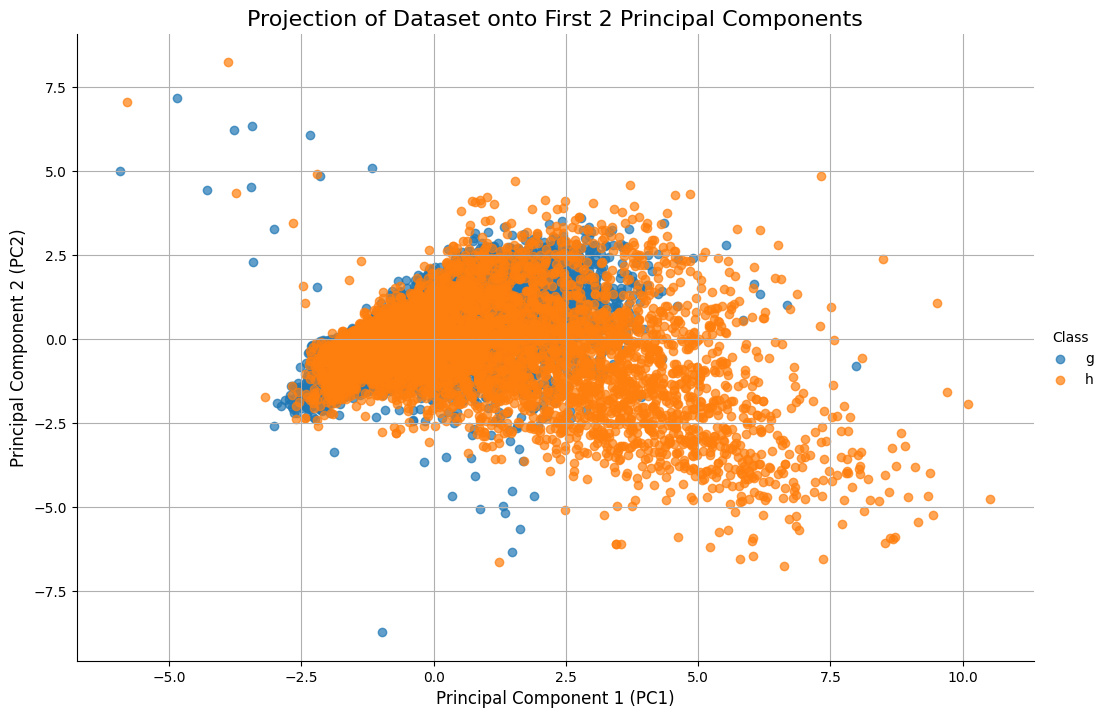

In [30]:
# Create a DataFrame for easy plotting
pca_df = pd.DataFrame(data=pca_2_transformed, columns=['PC1', 'PC2']) # note that pca_2_transformed is a numpy array
pca_df['Class'] = classes  # Add class labels to the DataFrame

# Create a scatter plot with Seaborn
sns.lmplot(
    x='PC1', 
    y='PC2', 
    hue='Class', 
    data=pca_df, 
    fit_reg=False,  # Disable regression line
    height=7,  # Size of the plot
    aspect=1.5,  # Aspect ratio
    scatter_kws={'alpha': 0.7}  # Adjust transparency
)

# Add labels and title
plt.title("Projection of Dataset onto First 2 Principal Components", fontsize=16)
plt.xlabel("Principal Component 1 (PC1)", fontsize=12)
plt.ylabel("Principal Component 2 (PC2)", fontsize=12)
plt.grid(True)
plt.show()

### Training a Support Vector Classifier with the 2 main components

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the transformed features into training and testing sets
seed = 42
test_train_split = 0.2 # 20% of the data will be used for testing
X_train, X_test, y_train, y_test = train_test_split(pca_2_transformed, classes, test_size=test_train_split, random_state=seed)

# Step 3: Initialize the Support Vector Classifier
svc = SVC(kernel='linear', random_state=seed)

# Step 4: Fit the classifier to the training data
svc.fit(X_train, y_train)

# Step 5: Predict the labels for the test data
y_pred = svc.predict(X_test)

# Step 6: Generate the classification score
score = accuracy_score(y_test, y_pred)

# Print the results
print("Accuracy of the SVC on PCA-transformed data (2 components):", score)

Accuracy of the SVC on PCA-transformed data (2 components): 0.7105678233438486


### Training a Support Vector Classifier with the first 2 features of the standarised matrix

In [32]:

# Select the first two features from the standardized data matrix
first_two_original_features = [0, 1]
X_original_2_features_subset = data_matrix_standardized.iloc[:, first_two_original_features]

# Split the data into training and testing sets
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X_original_2_features_subset, classes, test_size=test_train_split, random_state=seed
)

# Step 3: Initialize the Support Vector Classifier
svc_original_features = SVC(kernel='linear', random_state=seed)

# Step 4: Fit the classifier to the training data
svc_original_features.fit(X_train_original, y_train_original)

# Step 5: Predict the labels for the test data
y_pred_original = svc_original_features.predict(X_test_original)

# Step 6: Generate the classification score
score_original_features = accuracy_score(y_test_original, y_pred_original)

# Print the results
print("Accuracy of the SVC using the first two features of the original standardized data matrix:")
print(score_original_features)


Accuracy of the SVC using the first two features of the original standardized data matrix:
0.7200315457413249
